     Month  Robberies
0  1966-01         41
1  1966-02         39
2  1966-03         50
3  1966-04         40
4  1966-05         43


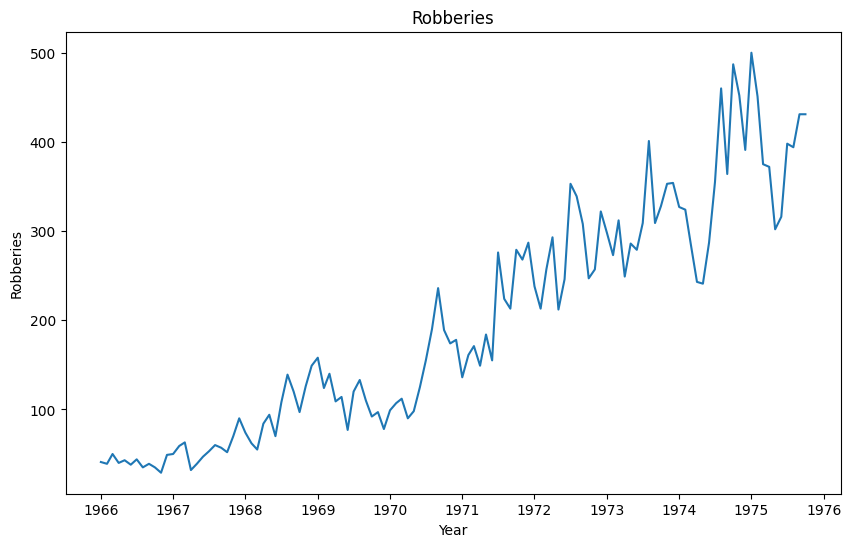

ADF Statistic: 1.001102140245781
p-value: 0.994277563805723
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


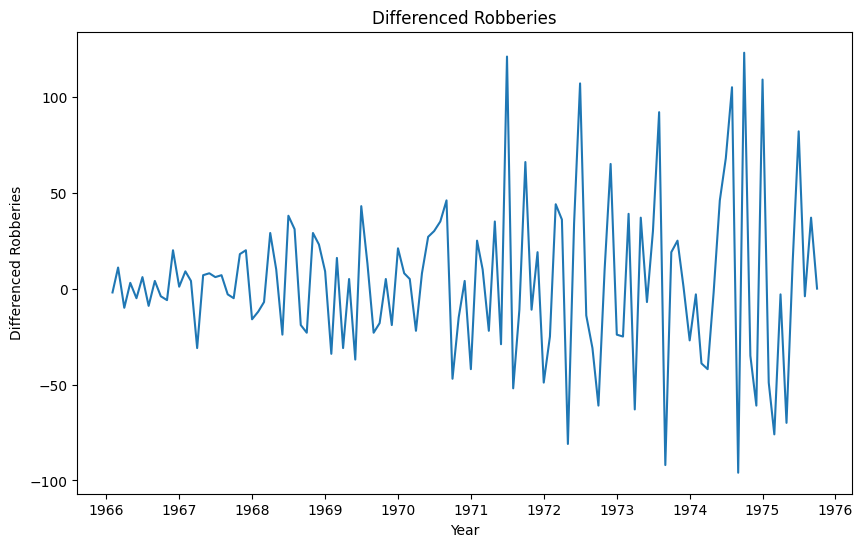

ADF Statistic (after differencing): -7.42856447506721
p-value (after differencing): 6.450795412686658e-11
Critical Values (after differencing):
	1%: -3.494
	5%: -2.889
	10%: -2.582


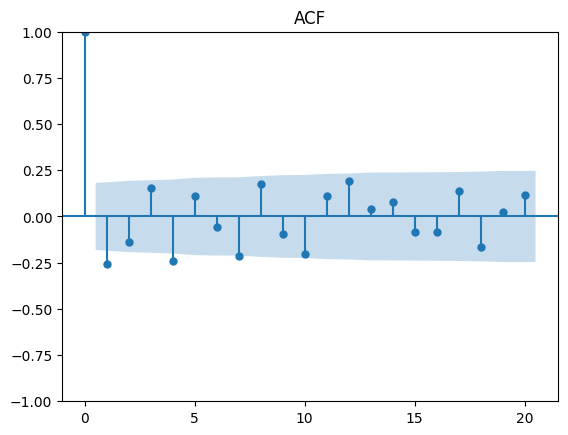

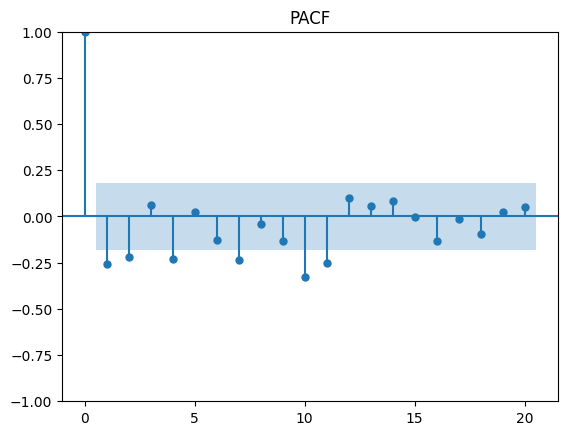

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


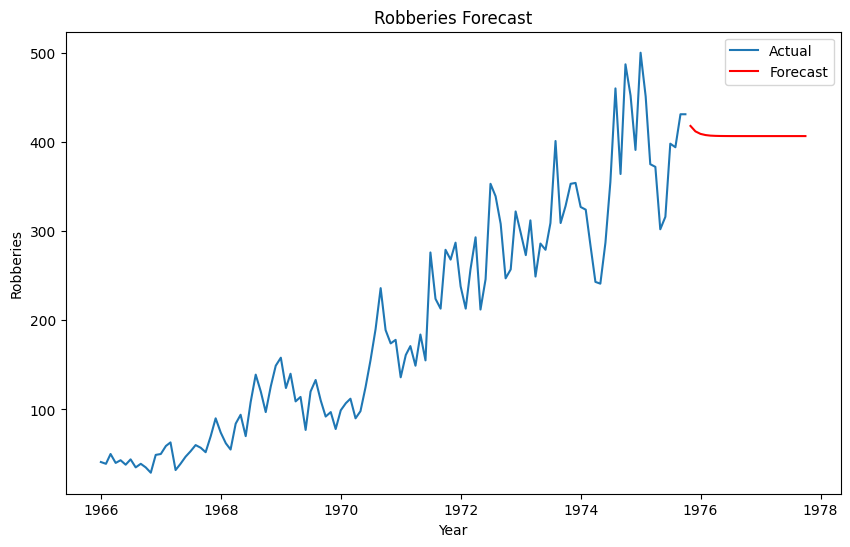

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv"
df = pd.read_csv(url)

# Check the first few rows of the dataset
print(df.head())

# Convert the 'Month' column to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Robberies')
plt.title('Robberies')
plt.show()

# Perform Augmented Dickey-Fuller Test for stationarity
result = adfuller(df['Robberies'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the data is not stationary, apply differencing
diff = df.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(diff)
plt.xlabel('Year')
plt.ylabel('Differenced Robberies')
plt.title('Differenced Robberies')
plt.show()

# Perform Augmented Dickey-Fuller Test again
result_diff = adfuller(diff['Robberies'])
print('ADF Statistic (after differencing):', result_diff[0])
print('p-value (after differencing):', result_diff[1])
print('Critical Values (after differencing):')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot ACF and PACF to determine the order of ARIMA(p,d,q)
plot_acf(diff, lags=20)
plt.title('ACF')
plt.show()

plot_pacf(diff, lags=20)
plt.title('PACF')
plt.show()

# Fit the ARIMA model
model = ARIMA(df, order=(1, 1, 1))
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=24)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Robberies'], label='Actual')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Robberies')
plt.title('Robberies Forecast')
plt.legend()
plt.show()